# Access historical data

In [18]:
%matplotlib inline
%pylab inline --no-import-all
pylab.rcParams['figure.figsize'] = (18, 10)

Populating the interactive namespace from numpy and matplotlib


In [19]:
from ntfdl import dl

In [20]:
stl = dl('STL', exchange='OSE', download=False)

In [21]:
history = stl.get_history()

In [22]:
history.tail()

,date,open,high,low,close,volume,turnover
date,,,,,,,
2017-10-17,2017-10-17,162.1,162.4,160.7,162.0,2937792,475396666
2017-10-18,2017-10-18,161.1,162.0,160.6,161.3,2576762,415581118
2017-10-19,2017-10-19,161.0,161.6,159.7,160.6,3593012,576751737
2017-10-20,2017-10-20,161.0,163.2,161.0,163.1,4099891,665036975
2017-10-23,2017-10-23,162.8,163.7,162.1,163.4,1755854,286245798


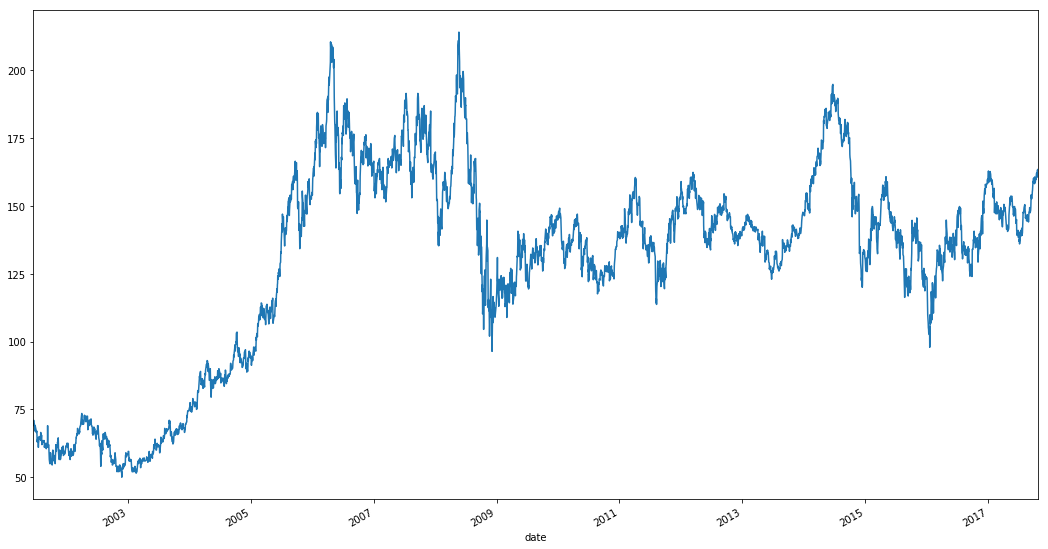

In [23]:
history.close.plot()

### Including moving averages
Moving averages are calculated using pandas rolling.mean() and adds a column for each window given in the list where each columns is prefixed 'ma' followed by window size.

In [24]:
history_ma = stl.get_history(mas=[10,20,50,100,200])

In [25]:
history_ma.tail(5)

,date,open,high,low,close,volume,turnover,ma10,ma20,ma50,ma100,ma200
date,,,,,,,,,,,,
2017-10-17,2017-10-17,162.1,162.4,160.7,162.0,2937792,475396666,160.03,159.120,152.330,147.793,149.1970
2017-10-18,2017-10-18,161.1,162.0,160.6,161.3,2576762,415581118,160.34,159.470,152.588,147.918,149.2035
2017-10-19,2017-10-19,161.0,161.6,159.7,160.6,3593012,576751737,160.33,159.735,152.838,148.055,149.1920
2017-10-20,2017-10-20,161.0,163.2,161.0,163.1,4099891,665036975,160.78,160.100,153.190,148.215,149.2100
2017-10-23,2017-10-23,162.8,163.7,162.1,163.4,1755854,286245798,161.23,160.315,153.532,148.386,149.2170


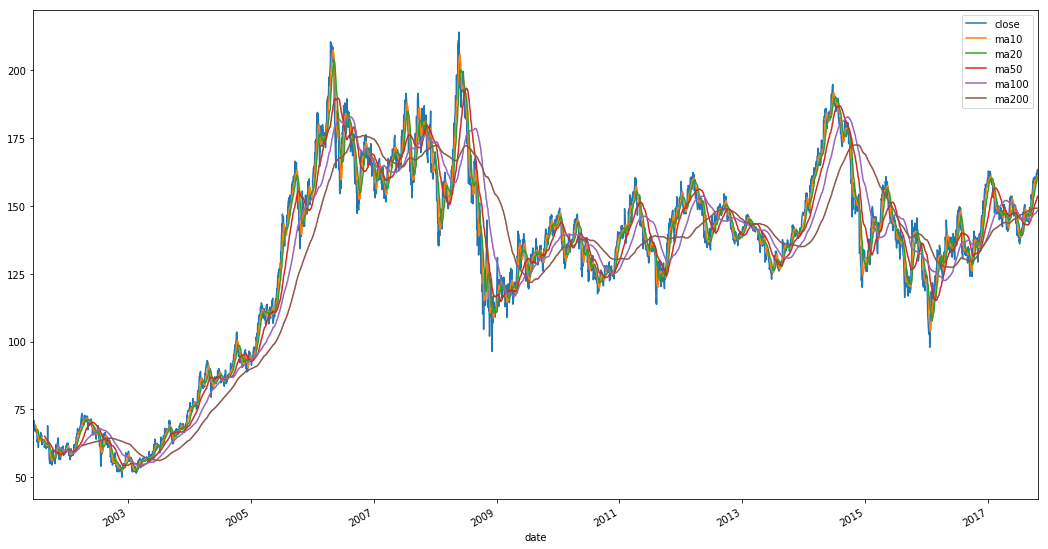

In [26]:
#history_ma.reindex(index=history_ma.index[::-1])
history_ma[['close','ma10','ma20','ma50','ma100','ma200']].plot()

Busy chart, let's instead slice the pandas with the [from:to] syntax looking at 2008 and 2009.

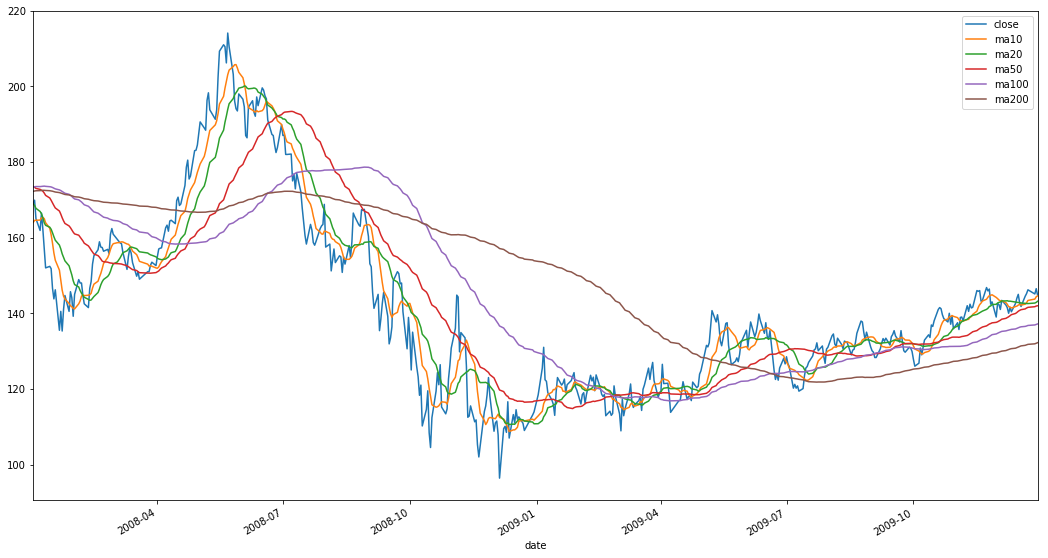

In [27]:
history_ma['2008-01-01':'2010-01-01'][['close','ma10','ma20','ma50','ma100','ma200']].plot()